이번 주차 과제는 간단한 이미지 데이터를 활용해 크기가 큰 데이터의 차원 축소를 진행하고 데이터의 라벨에 따라 클러스터링을 진행하는 과제입니다.

###필요한 모듈을 가져오세요.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Image data 가져오기
https://www.kaggle.com/datasets/zalando-research/fashionmnist/data

###위 링크의 fashion mnist 데이터의 train dataset과 test dataset을 가져오세요.
(데이터의 용량이 크니 직접 다운로드 하지 말고 코드를 이용해 가져오도록 해보세요.)

In [ ]:
import tensorflow as tf

# 1. Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


###데이터에 대한 정보들을 보여주세요.
(필수: 요약, 모양, 크기, 결측치 여부 등)

In [ ]:
print ('Training data:', train_images.shape, train_labels.shape)
print ('Test data:', test_images.shape, test_labels.shape)
#28*28 크기 이미지 각각 60000, 10000개

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


In [ ]:
#결측값 없음
print(np.isnan(train_images).any(),
np.isnan(train_labels).any(),
np.isnan(test_images).any(),
np.isnan(test_labels).any())

False False False False


### Data중 첫 번째 이미지를 보여주세요.

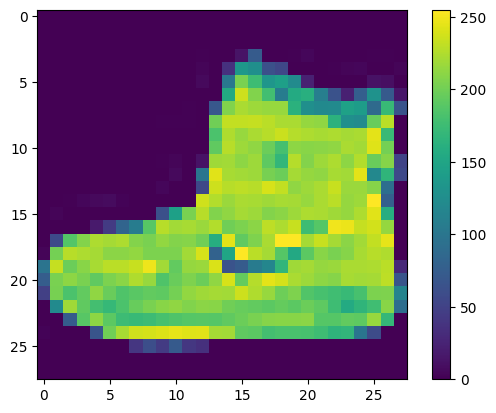

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# 이미지 전처리

### 이미지 데이터를 머신러닝에 이용하기 편한 형태로 바꾸어 합니다.
(torch model 사용 - tensor 형태로 바꾸기 등)

In [ ]:
import torch

# Convert NumPy arrays to PyTorch tensors
train_images_tensor = torch.tensor(train_images, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)
test_images_tensor = torch.tensor(test_images, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)

### 이미지 데이터는 픽셀 값이 0 - 255로 이루어져 있습니다. 이 값을 0 - 1까지의 값으로 normalize 해주세요.

In [ ]:
# Normalize pixel values to the range [0, 1]
train_images_tensor = train_images_tensor / 255.0
test_images_tensor = test_images_tensor / 255.0

In [ ]:
# Print the shapes of the tensors to verify the transformation
print("Train Images Tensor Shape:", train_images_tensor.shape)
print("Train Labels Tensor Shape:", train_labels_tensor.shape)
print("Test Images Tensor Shape:", test_images_tensor.shape)
print("Test Labels Tensor Shape:", test_labels_tensor.shape)

Train Images Tensor Shape: torch.Size([60000, 28, 28])
Train Labels Tensor Shape: torch.Size([60000])
Test Images Tensor Shape: torch.Size([10000, 28, 28])
Test Labels Tensor Shape: torch.Size([10000])


### 추가적인 이미지 전처리를 진행해주세요.
(차원을 수정하는 것은 뒤의 문제에서 진행할 것이므로 여기에서 하지 마세요.)

In [ ]:
#28*28 이미지를 펼쳐서 요소가 784개인 벡터로
train_images_2d = train_images_tensor.view(train_images_tensor.shape[0], -1).numpy()


In [ ]:
train_images_2d.shape

(60000, 784)

# 차원 축소
차원 축소란 고차원 데이터를 효율적으로 처리하기 위한 기법입니다.
### 그 중 대표적인 PCA와 t-sne에 대한 내용을 비교하여 아래에 적어주세요.

# t-SNE
t-분포를 따르도록 고차원 데이터를 각 데이터 사이 '거리'를 최대한 보존하는 방식으로 차원을 축소한다.
고차원에서 거리가 가까운 데이터를 차원 축소 후 저차원에서도 거리가 가깝도록 위치시킨다.

## PCA

pca는 주성분 분석으로 고차원의 데이터를 분산을 최대화 하는 서로 직교하는 새로운 축을 찾아 고차원 공간의 표본을 선형 연관성이 없는 저차원 공간으로 변환하는 기법이다.
데이터 거리나 분포가 잘 유지되면 효과적이지만, 어느 방향에서도 분포가 비슷한 경우는 효과가 없다.

또한 새롭게 생성된 차원에 대한 해석이 어려워질 수 있다.

클러스터링 시에는 분포만 유지되면 효과적이다.

### 현재 데이터는 28*28로 784차원을 가지고 있습니다. PCA를 이용하여 데이터들을 가장 잘 설명하는 50개의 변수만으로 데이터를 변환하시오.

In [ ]:
pca = PCA(n_components=50)
pca.fit(train_images_2d)

PCA(n_components=50)

In [ ]:
train_images_pca=pca.transform(train_images_2d)

### PCA 이후 데이터들의 설명된 분산 비율 (explained variance ratio)를 출력하세요.

In [ ]:
train_images_pca.shape

(60000, 50)

In [ ]:
pca.explained_variance_ratio_

array([0.29033506, 0.17757271, 0.0601785 , 0.04956276, 0.03848124,
       0.03461266, 0.02342103, 0.01905498, 0.01350069, 0.0131449 ,
       0.00993074, 0.00913393, 0.0076594 , 0.00659801, 0.00607944,
       0.00589944, 0.00551907, 0.00524538, 0.00458149, 0.00455585,
       0.00433766, 0.00407165, 0.00384818, 0.00372603, 0.00361182,
       0.0035071 , 0.00333306, 0.00319419, 0.003081  , 0.00293319,
       0.00275649, 0.00265108, 0.00263747, 0.00255873, 0.00246252,
       0.00235938, 0.00230327, 0.00225558, 0.00218511, 0.00209355,
       0.00200316, 0.00195766, 0.00194721, 0.00182813, 0.00175366,
       0.00171952, 0.00168819, 0.00163994, 0.00160932, 0.00154861],
      dtype=float32)

### PCA를 시행하면 데이터가 수정되므로 원본 데이터와 차이가 생기게 됩니다. 이때 이 차이를 재구성 오차(Reconstruction Error)라고 합니다. 재구성 오차를 mse(오차제곱합) 방식으로 구하시오.

In [ ]:
#다시 원래 차원으로 변환
train_images_reconstructed = pca.inverse_transform(train_images_pca)

#MSE 계산
mse = np.mean((train_images_2d - train_images_reconstructed)**2)
print(f"Reconstruction Error (MSE): {mse}")

Reconstruction Error (MSE): 0.011947275139391422


### 이번에는 PCA를 통해 원본 데이터를 30차원으로 줄이고, explained variance ratio와 reconstructon error를 구하시오.

In [ ]:
pca = PCA(n_components=30)
pca.fit(train_images_2d)
train_images_pca_30=pca.transform(train_images_2d)

In [ ]:
pca.explained_variance_ratio_

array([0.29033506, 0.17757271, 0.0601785 , 0.04956276, 0.03848124,
       0.03461266, 0.02342103, 0.01905498, 0.01350069, 0.0131449 ,
       0.00993074, 0.00913393, 0.0076594 , 0.00659801, 0.00607944,
       0.00589944, 0.00551907, 0.00524538, 0.00458149, 0.00455585,
       0.00433766, 0.00407165, 0.00384818, 0.00372603, 0.00361182,
       0.0035071 , 0.00333306, 0.00319419, 0.003081  , 0.00293319],
      dtype=float32)

In [ ]:
train_images_reconstructed_30 = pca.inverse_transform(train_images_pca_30)

#MSE 계산
mse = np.mean((train_images_2d - train_images_reconstructed_30)**2)
print(f"Reconstruction Error (MSE): {mse}")

Reconstruction Error (MSE): 0.015597597695887089


### 데이터를 30차원으로 줄인 결과와 50차원으로 줄인 결과에는 어떤 차이가 있습니까?

재구성 오차는 갯수만 차이있고, MSE는 커졌다.

### 마지막으로 원본 데이터를 2차원으로 줄이고, explained variance ratio와 reconstruction error를 구하시오.

In [ ]:
pca = PCA(n_components=2)
pca.fit(train_images_2d)
train_images_pca_2=pca.transform(train_images_2d)

In [ ]:
pca.explained_variance_ratio_

array([0.29033506, 0.17757271], dtype=float32)

In [ ]:
train_images_reconstructed_2 = pca.inverse_transform(train_images_pca_2)

#MSE 계산
mse = np.mean((train_images_2d - train_images_reconstructed_2)**2)
print(f"Reconstruction Error (MSE): {mse}")

Reconstruction Error (MSE): 0.046294327825307846


### 2차원으로 축소한 데이터를 시각화하여 보여주세요. 대신 데이터의 label에 따라 색상을 다르게 해주세요.

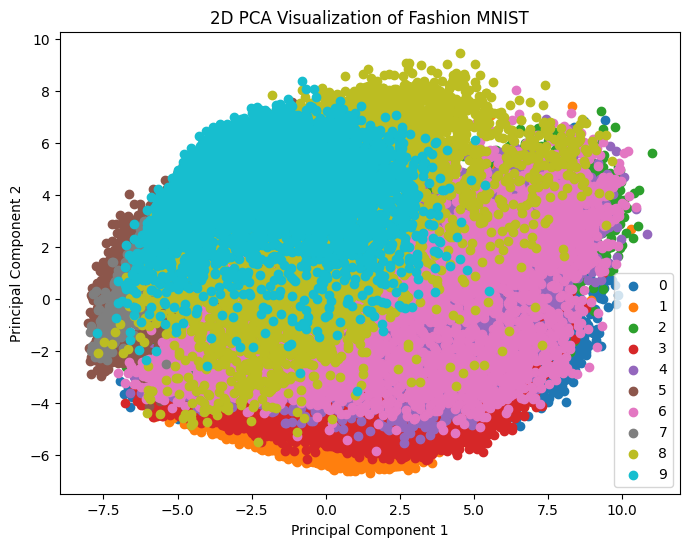

In [ ]:
# 2차원으로 축소한 데이터 시각화
plt.figure(figsize=(8, 6))
for label in range(10):  # 0부터 9까지의 label
    indices = train_labels == label
    plt.scatter(train_images_pca_2[indices, 0], train_images_pca_2[indices, 1], label=str(label))
plt.legend()
plt.title('2D PCA Visualization of Fashion MNIST')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## T-SNE

### 앞서 pca를 통해 50차원으로 줄인 데이터를 t-sne를 통해 시각화 하세요.

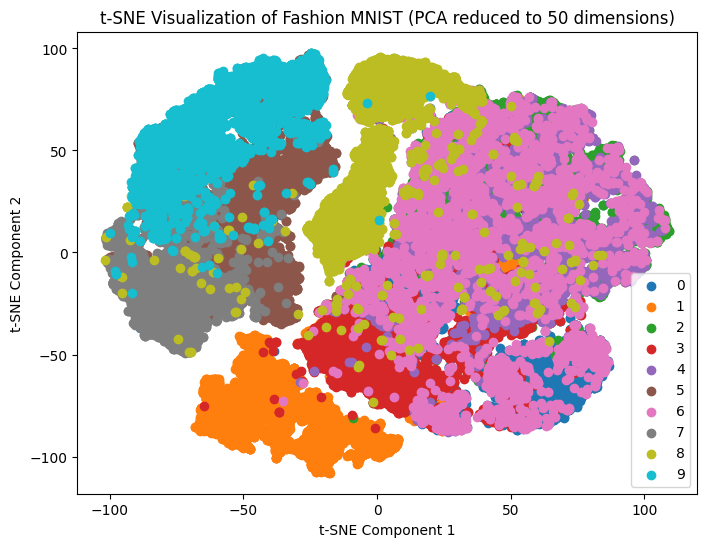

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
train_images_tsne = tsne.fit_transform(train_images_pca)

# 시각화
plt.figure(figsize=(8, 6))
for label in range(10):
    indices = train_labels == label
    plt.scatter(train_images_tsne[indices, 0], train_images_tsne[indices, 1], label=str(label))
plt.legend()
plt.title('t-SNE Visualization of Fashion MNIST (PCA reduced to 50 dimensions)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


### 앞서 pca를 통해 30차원으로 줄인 데이터를 t-sne를 통해 시각화 하세요.

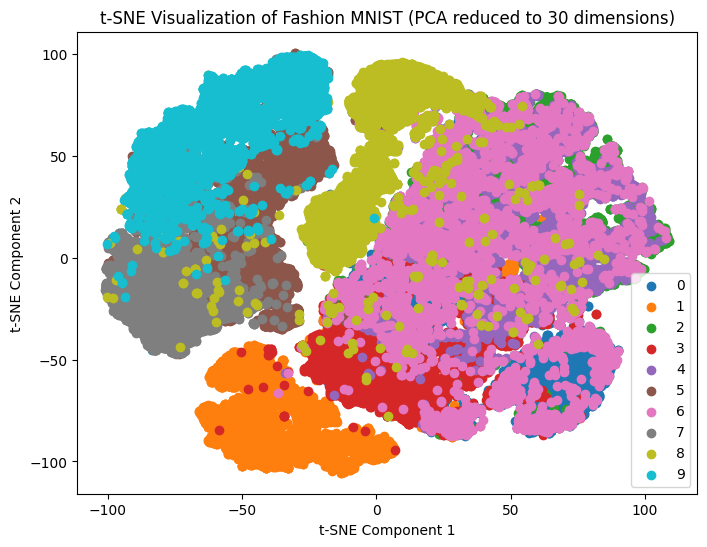

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
train_images_tsne_30 = tsne.fit_transform(train_images_pca_30)

# 시각화
plt.figure(figsize=(8, 6))
for label in range(10):
    indices = train_labels == label
    plt.scatter(train_images_tsne_30[indices, 0], train_images_tsne_30[indices, 1], label=str(label))
plt.legend()
plt.title('t-SNE Visualization of Fashion MNIST (PCA reduced to 30 dimensions)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


## 군집화

### PCA를 통해 50차원으로 줄인 데이터를 DBSCAN을 이용하여 군집화 하시오.

In [1]:
# DBSCAN 클러스터링 수행
dbscan = DBSCAN(eps=3, min_samples=5)  # eps와 min_samples는 데이터에 따라 조정 필요
dbscan_labels = dbscan.fit_predict(train_images_pca)

NameError: name 'DBSCAN' is not defined

In [2]:
# t-SNE로 차원 축소
tsne = TSNE(n_components=2, random_state=0)
train_images_tsne_dbscan = tsne.fit_transform(train_images_pca)

NameError: name 'TSNE' is not defined

In [ ]:
# 시각화
plt.figure(figsize=(8, 6))
unique_labels = set(dbscan_labels)  # DBSCAN에서 생성된 유일한 클러스터 레이블
for cluster_label in unique_labels:
    if cluster_label == -1:
        # Noise points를 위한 별도의 색상
        plt.scatter(train_images_tsne_dbscan[dbscan_labels == cluster_label, 0],
                    train_images_tsne_dbscan[dbscan_labels == cluster_label, 1],
                    label='Noise', color='gray', alpha=0.5)
    else:
        plt.scatter(train_images_tsne_dbscan[dbscan_labels == cluster_label, 0],
                    train_images_tsne_dbscan[dbscan_labels == cluster_label, 1],
                    label=f'Cluster {cluster_label}')

plt.legend()
plt.title('t-SNE Visualization of Fashion MNIST after DBSCAN Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

### k-means를 통해 50차원으로 줄인 데이터를 군집화 하시오.(군집의 개수는 10개로 하시오.)

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0)
train_images_kmeans = kmeans.fit_predict(train_images_pca)

### 엘보우 메소드를 이용하여 k-means에서 가장 적절한 군집의 개수를 구하시오.

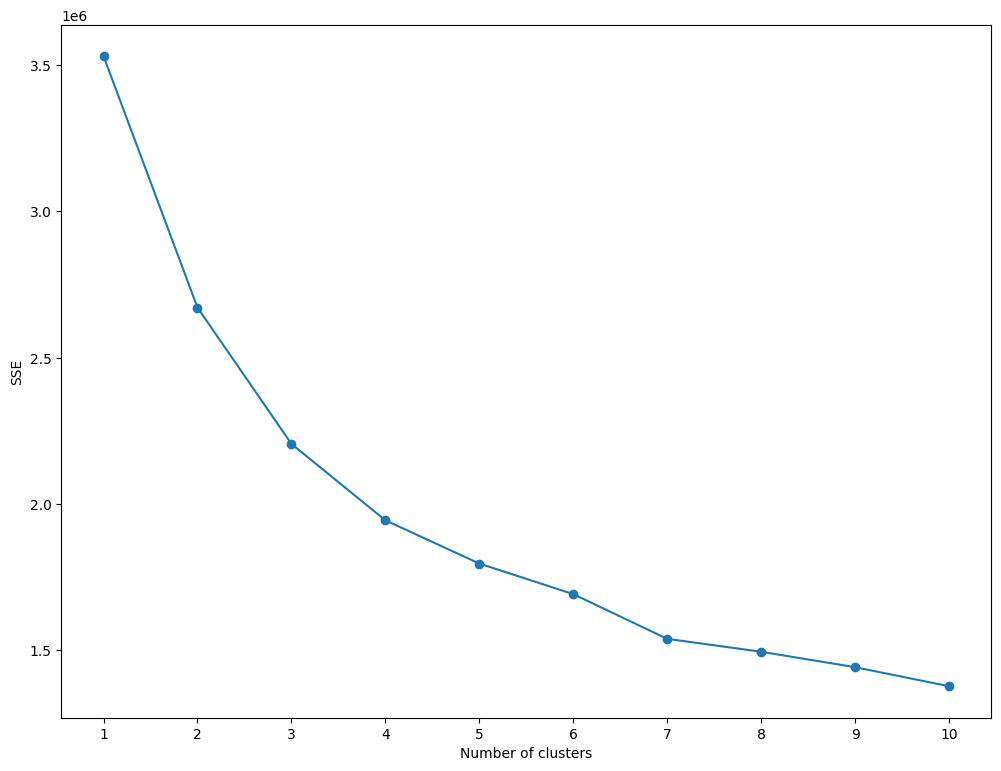

In [ ]:
sse=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(train_images_pca)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(12,9))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.xticks(range(1,11))
plt.show()

### k-means 최적의 군집 개수로 다시 군집화 하여 시각화 하시오.

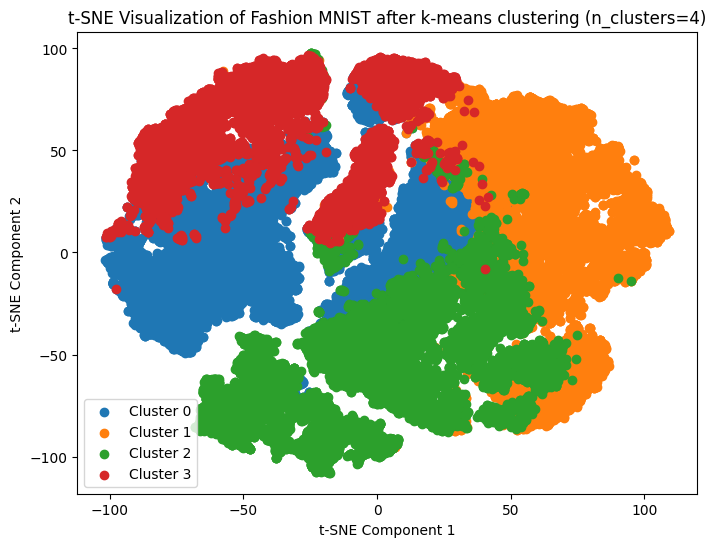

In [ ]:
# k-means (n_clusters=4) 후 t-SNE 시각화
kmeans = KMeans(n_clusters=4, random_state=0)
train_images_kmeans = kmeans.fit_predict(train_images_pca)

tsne = TSNE(n_components=2, random_state=0)
train_images_tsne_kmeans = tsne.fit_transform(train_images_pca)

plt.figure(figsize=(8, 6))
for cluster_label in range(4):  # k-means의 클러스터 개수에 맞춰 변경
    indices = train_images_kmeans == cluster_label
    plt.scatter(train_images_tsne_kmeans[indices, 0], train_images_tsne_kmeans[indices, 1], label=f'Cluster {cluster_label}')
plt.legend()
plt.title('t-SNE Visualization of Fashion MNIST after k-means clustering (n_clusters=4)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

### 다른 추가적인 군집화 기법을 2가지 이상 사용하여 pca 50 데이터를 시각화 하시오.

In [ ]:
#GMM 클러스터링
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=10, random_state=0)
gmm_labels = gmm.fit_predict(train_images_pca)

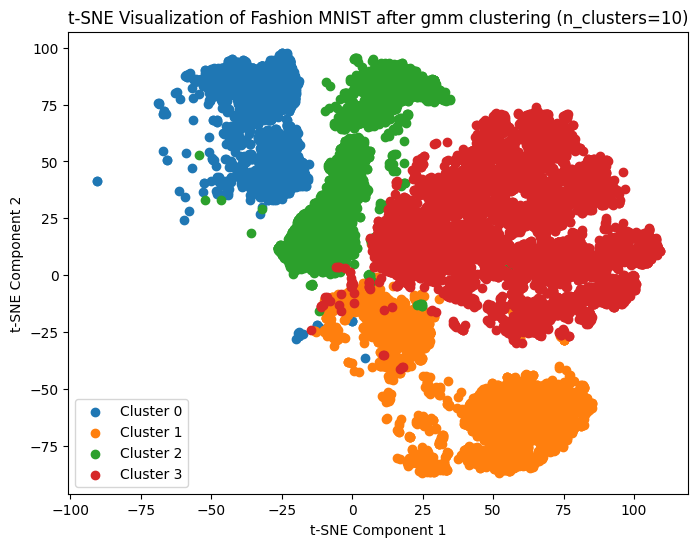

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
train_images_tsne_gmm = tsne.fit_transform(train_images_pca)


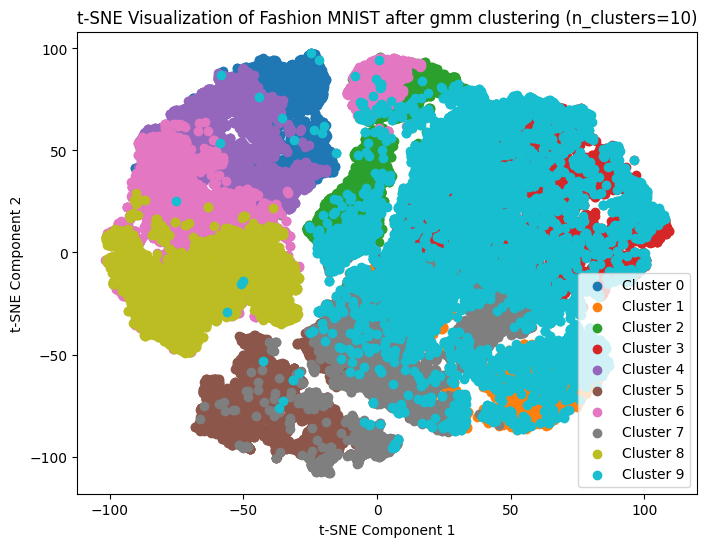

In [51]:
plt.figure(figsize=(8, 6))
for cluster_label in range(10):
    indices = gmm_labels == cluster_label
    plt.scatter(train_images_tsne_gmm[indices, 0], train_images_tsne_gmm[indices, 1], label=f'Cluster {cluster_label}')
plt.legend()
plt.title('t-SNE Visualization of Fashion MNIST after gmm clustering (n_clusters=10)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [52]:
# 스펙트럴 클러스터링
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=10, affinity='nearest_neighbors', random_state=0)
spectral_labels = spectral.fit_predict(train_images_pca)

In [53]:
tsne = TSNE(n_components=2, random_state=0)
train_images_tsne_spectral = tsne.fit_transform(train_images_pca)

plt.figure(figsize=(8, 6))
for cluster_label in range(10):
    indices = spectral_labels == cluster_label
    plt.scatter(train_images_tsne_spectral[indices, 0], train_images_tsne_spectral[indices, 1], label=f'Cluster {cluster_label}')
plt.legend()
plt.title('t-SNE Visualization of Fashion MNIST after gmm clustering (n_clusters=10)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

## 군집화 결과 비교

### 앞선 모든 군집화 모델의 결과를 실루엣 점수(Silhouette score)를 이용하여 성능을 비교하시오.

In [58]:
# DBSCAN 클러스터링을 사용한 경우
# -1 (노이즈) 레이블을 제외합니다.
if len(set(dbscan_labels)) > 1:  # 클러스터가 하나만 있는 경우를 방지
    silhouette_avg = silhouette_score(train_images_pca[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f'DBSCAN Silhouette Score: {silhouette_avg:.3f}')
else:
    print("DBSCAN resulted in only one cluster or noise, silhouette score cannot be computed.")

silhouette_avg_kmeans = silhouette_score(train_images_pca, train_images_kmeans)
print(f"Silhouette Score (KMeans): {silhouette_avg_kmeans}")

silhouette_avg_gmm = silhouette_score(train_images_pca, gmm_labels)
print(f"Silhouette Score (GMM): {silhouette_avg_gmm}")

silhouette_avg_spectral = silhouette_score(train_images_pca, spectral_labels)
print(f"Silhouette Score (Spectral Clustering): {silhouette_avg_spectral}")

DBSCAN resulted in only one cluster or noise, silhouette score cannot be computed.
Silhouette Score (KMeans): 0.21804793179035187
Silhouette Score (GMM): 0.08649622648954391
Silhouette Score (Spectral Clustering): 0.19003473222255707


### 실루엣 점수를 통해 군집화 모델의 성능에 대한 간단한 해석을 적으세요.

실루엣 점수가 가장 높은 kmeans가 가장군집화가 잘되었다